In [18]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt

--2019-07-08 07:29:19--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/irish-lyrics-eof.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.121.128, 2607:f8b0:4001:c09::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.121.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68970 (67K) [text/plain]
Saving to: ‘irish-lyrics-eof.txt.1’

irish-lyrics-eof.tx 100%[===================>]  67.35K  --.-KB/s    in 0.001s  

2019-07-08 07:29:19 (120 MB/s) - ‘irish-lyrics-eof.txt.1’ saved [68970/68970]



In [0]:
data = open("irish-lyrics-eof.txt").read()

In [20]:
data

'Come all ye maidens young and fair\nAnd you that are blooming in your prime\nAlways beware and keep your garden fair\nLet no man steal away your thyme\nFor thyme it is a precious thing\nAnd thyme brings all things to my mind\nnlyme with all its flavours, along with all its joys\nThyme, brings all things to my mind\nOnce I and a bunch of thyme\ni thought it never would decay\nThen came a lusty sailor\nWho chanced to pass my way\nAnd stole my bunch of thyme away\nThe sailor gave to me a rose\nA rose that never would decay\nHe gave it to me to keep me reminded\nOf when he stole my thyme away\nSleep, my child, and peace attend thee\nAll through the night\nGuardian angels God will send thee\nSoft the drowsy hours are creeping\nHill and dale in slumber sleeping\nI my loving vigil keeping\nWhile the moon her watch is keeping\nWhile the weary world is sleeping\nOer thy spirit gently stealing\nVisions of delight revealing\nBreathes a pure and holy feeling\nThough I roam a minstrel lonely\nMy t

In [0]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Dense,Bidirectional,LSTM,Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np

In [0]:
c = data.lower().split("\n")
tokenizer = Tokenizer()

In [27]:
tokenizer.fit_on_texts(c)
total_word = len(tokenizer.word_index) + 1
print(tokenizer.word_index)
print(total_word)
input_sequences = []
for i in c:
  token_list = tokenizer.texts_to_sequences([i])[0]
  for j in range(1,len(token_list)):
    n_gram_sequence = token_list[:j+1]
    input_sequences.append(n_gram_sequence)
max_sequence_length = max([len(x) for x in input_sequences])
input_padd_sequence = np.array(pad_sequences(input_sequences,maxlen=max_sequence_length,padding="pre"))
print(input_padd_sequence.shape)

{'the': 1, 'and': 2, 'i': 3, 'to': 4, 'a': 5, 'of': 6, 'my': 7, 'in': 8, 'me': 9, 'for': 10, 'you': 11, 'all': 12, 'was': 13, 'she': 14, 'that': 15, 'on': 16, 'with': 17, 'her': 18, 'but': 19, 'as': 20, 'when': 21, 'love': 22, 'is': 23, 'your': 24, 'it': 25, 'will': 26, 'from': 27, 'by': 28, 'they': 29, 'be': 30, 'are': 31, 'so': 32, 'he': 33, 'old': 34, 'no': 35, 'oh': 36, 'ill': 37, 'at': 38, 'one': 39, 'his': 40, 'there': 41, 'were': 42, 'heart': 43, 'down': 44, 'now': 45, 'we': 46, 'where': 47, 'young': 48, 'never': 49, 'go': 50, 'come': 51, 'then': 52, 'did': 53, 'not': 54, 'said': 55, 'away': 56, 'their': 57, 'sweet': 58, 'them': 59, 'green': 60, 'if': 61, 'take': 62, 'our': 63, 'like': 64, 'night': 65, 'day': 66, 'o': 67, 'out': 68, 'fair': 69, 'this': 70, 'town': 71, 'have': 72, 'can': 73, 'true': 74, 'its': 75, 'thou': 76, 'see': 77, 'dear': 78, 'more': 79, 'theres': 80, 'or': 81, 'had': 82, 'would': 83, 'over': 84, 'hear': 85, 'up': 86, 'ive': 87, 'through': 88, 'home': 89, '

In [0]:
xs,label = input_padd_sequence[:,:-1],input_padd_sequence[:,-1]
ys = tf.keras.utils.to_categorical(label,num_classes=total_word)

In [0]:
model = Sequential()

In [30]:
model.add(Embedding(total_word,64,input_length=max_sequence_length-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_word,activation="softmax"))
adam = Adam(lr=0.01)
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])
history = model.fit(xs,ys,epochs=100,verbose=1)

W0708 07:29:57.216176 139849427384192 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
12038/12038 [==============================] - 22s 2ms/sample - loss: 6.7718 - acc: 0.0638
Epoch 2/100
12038/12038 [==============================] - 20s 2ms/sample - loss: 6.2436 - acc: 0.0749
Epoch 3/100
12038/12038 [==============================] - 20s 2ms/sample - loss: 5.9700 - acc: 0.0822
Epoch 4/100
12038/12038 [==============================] - 20s 2ms/sample - loss: 5.6976 - acc: 0.0932
Epoch 5/100
12038/12038 [==============================] - 20s 2ms/sample - loss: 5.3902 - acc: 0.1092
Epoch 6/100
12038/12038 [==============================] - 20s 2ms/sample - loss: 5.0550 - acc: 0.1232
Epoch 7/100
12038/12038 [==============================] - 20s 2ms/sample - loss: 4.7052 - acc: 0.1406
Epoch 8/100
12038/12038 [==============================] - 20s 2ms/sample - loss: 4.3546 - acc: 0.1645
Epoch 9/100
12038/12038 [==============================] - 20s 2ms/sample - loss: 4.0088 - acc: 0.1979
Epoch 10/100
12038/12038 [==============================] - 20s 2ms/sampl

In [0]:
import matplotlib.pyplot as plt

In [0]:
def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,"val_"+string])
  plt.show()

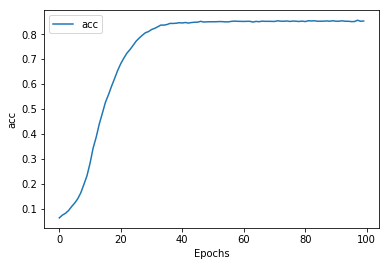

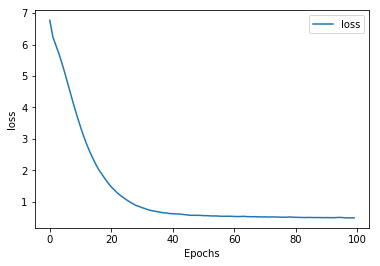

In [34]:
plot_graphs(history,"acc")
plot_graphs(history,"loss")

In [35]:
seed_text = " all ye maidens"
next_words = 100

for _ in range(next_words):
  token_list = tokenizer.texts_to_sequences([seed_text])[0]
  token_list = pad_sequences([token_list],maxlen=max_sequence_length-1,padding="pre")
  predict = model.predict_classes(token_list,verbose=0)
  output_word= ""
  
  for word,index in tokenizer.word_index.items():
    if index == predict:
      output_word = word
      break
  seed_text += " " + output_word
print(seed_text)

 all ye maidens the fine old that ive ever been beaming and goblins ye your bride renownd of your love opened known are keep your hand on the sod today and light the best o in least it on my breast to the call today and the mountain eyes all and an old dead and they are your runaway and roddy misfortune sit so loves green and see the rose he would stranded as a tiny brave came and the tiny sea is neer go on your fathers cruel keep down him in the town of shoes on your eyes he sent me
